### Sentiment Analysis based on the reviews by customers using Logistic regression


Source- https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz


Analysis by- RAITI LIKHIT ADARSH

Platform- Jupyter notebook

In [1]:
import gzip
from collections import defaultdict
import string
import random
from nltk.stem.porter import PorterStemmer
import numpy

In [2]:
path = "C:/Users/KIIT/Desktop/AI & Data Science/Coursera Data Science 3/Final_Course3/datasets/amazon_reviews_us_Gift_Card_v1_00.tsv.gz"

In [3]:
f = gzip.open(path, 'rt', encoding = "utf8")

In [4]:
header = f.readline()
header = header.strip().split('\t')
header

['marketplace',
 'customer_id',
 'review_id',
 'product_id',
 'product_parent',
 'product_title',
 'product_category',
 'star_rating',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date']

In [5]:
dataset = []

In [6]:
for line in f:
    fields = line.strip().split('\t')
    d = dict(zip(header, fields))
    d['star_rating'] = int(d['star_rating'])
    d['helpful_votes'] = int(d['helpful_votes'])
    d['total_votes'] = int(d['total_votes'])
    dataset.append(d)
dataset[0]

{'marketplace': 'US',
 'customer_id': '24371595',
 'review_id': 'R27ZP1F1CD0C3Y',
 'product_id': 'B004LLIL5A',
 'product_parent': '346014806',
 'product_title': 'Amazon eGift Card - Celebrate',
 'product_category': 'Gift Card',
 'star_rating': 5,
 'helpful_votes': 0,
 'total_votes': 0,
 'vine': 'N',
 'verified_purchase': 'Y',
 'review_headline': 'Five Stars',
 'review_body': 'Great birthday gift for a young adult.',
 'review_date': '2015-08-31'}

In [7]:
# ignoring any capitalisation and punctuation and applying stemming (optional)
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
#stemmer = PorterStemmer()
for d in dataset:
    r = ''.join([c for c in d['review_body'].lower() if not c in punctuation])
    for w in r.split():
        #w = stemmer.stem(w)
        wordCount[w] += 1
        
print(len(wordCount))

46283


In [8]:
# Still too large for a dictionary to work with so extracting only popular words
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

words = [x[1] for x in counts[:1000]] # sort words by popularity and keep top 1000 of those

wordID = dict(zip(words, range(len(words)))) # to map each word with a unique ID
wordSet = set(words)
wordSet

{'awesome',
 'works',
 'facebook',
 'else',
 'picking',
 'hope',
 'win',
 'an',
 'took',
 'adult',
 'realized',
 'anyone',
 'many',
 'purchases',
 'just',
 'someones',
 'plus',
 'receiving',
 'issue',
 'amazing',
 'option',
 'lets',
 'amazon',
 'customers',
 'its',
 'book',
 'card',
 'computer',
 'her',
 'daughterinlaw',
 'mind',
 'checkout',
 'always',
 'orders',
 'company',
 'they',
 'egift',
 'small',
 'forward',
 'electronic',
 'web',
 'provided',
 'even',
 'miles',
 'you',
 'mothers',
 'school',
 'during',
 'deliver',
 'delighted',
 'point',
 'though',
 'doing',
 'son',
 'return',
 'gave',
 'efficient',
 'gotten',
 'thinking',
 'completely',
 'read',
 'into',
 'different',
 'sister',
 'told',
 'user',
 'games',
 'apps',
 'easier',
 'surprised',
 'someone',
 'long',
 'movies',
 'hours',
 'might',
 'who',
 'printer',
 'fact',
 'limited',
 'teacher',
 'credit',
 'simple',
 'provide',
 'think',
 'etc',
 'moment',
 'some',
 'br',
 'place',
 'loves',
 'whether',
 'a',
 'our',
 'come',
 

In [9]:
# Extracting features from most popular words
def feature(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_body'].lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[wordID[w]]+=1
    feat.append(1) #offset
    return feat  

In [10]:
random.shuffle(dataset)

In [11]:
X = [feature(d) for d in dataset]

In [12]:
y = [d['star_rating'] for d in dataset]

In [13]:
theta,residuals,rank,s = numpy.linalg.lstsq(X,y)

<ipython-input-13-15cb93633d6a>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = numpy.linalg.lstsq(X,y)


In [14]:
wordWeights = list(zip(theta, words+['offset']))
wordWeights.sort()

In [15]:
wordWeights[:10] # first ten (negative sentiments)

[(-1.2154565072717627, 'disappointing'),
 (-0.8574720172738836, 'disappointed'),
 (-0.7905359349220562, 'unable'),
 (-0.6808380275904122, 'waste'),
 (-0.6634111839366579, 'charged'),
 (-0.5391972452016675, 'supposed'),
 (-0.5292354754787684, 'unfortunately'),
 (-0.4973963444619464, 'australia'),
 (-0.496444564571295, 'tried'),
 (-0.47776774788212384, 'wont')]

In [16]:
wordWeights[-10:] # last ten (positive sentiments)

[(0.23601901891940358, 'whats'),
 (0.23833260149851446, 'problems'),
 (0.24436555664645837, 'particular'),
 (0.24700474913780007, 'worry'),
 (0.25361200245639987, 'exelente'),
 (0.25979131833146457, 'excelent'),
 (0.2714805522147924, 'excelente'),
 (0.31038243174659974, 'beat'),
 (0.3268898317787543, 'expire'),
 (4.65820008573705, 'offset')]

In [17]:
from sklearn import linear_model

In [52]:
model = linear_model.Ridge(3.0, fit_intercept = False)
model.fit(X,y)

Ridge(alpha=3.0, fit_intercept=False)

In [53]:
theta = model.coef_

In [54]:
wordWeights = list(zip(theta, words+['offset']))
wordWeights.sort()

In [55]:
wordWeights[:10]

[(-1.2005964963706497, 'disappointing'),
 (-0.8549823283014604, 'disappointed'),
 (-0.7859094966055556, 'unable'),
 (-0.6745973145067778, 'waste'),
 (-0.6597342733645544, 'charged'),
 (-0.5366240477324165, 'supposed'),
 (-0.5240824177961603, 'unfortunately'),
 (-0.4957675917671535, 'tried'),
 (-0.4938281073122182, 'australia'),
 (-0.4758609837926775, 'wont')]

In [56]:
wordWeights[-10:]

[(0.23514715447628107, 'whats'),
 (0.23795200370544367, 'problems'),
 (0.2415827704471932, 'particular'),
 (0.2461906807811664, 'worry'),
 (0.25198018687233054, 'exelente'),
 (0.25960318596374266, 'excelent'),
 (0.27150254907620924, 'excelente'),
 (0.30762795970773643, 'beat'),
 (0.3238437727824188, 'expire'),
 (4.657906682928008, 'offset')]

In [57]:
predictions = model.predict(X)

In [58]:
difference = [(x-y)**2 for (x,y) in zip(predictions,y)]

In [59]:
MSE = sum(difference)/len(difference)

In [60]:
print("MSE is " + str(MSE))

MSE is 0.42600802772525603


In [61]:
FVU = MSE/numpy.var(y)
R2 = 1-FVU
print("R2 is " + str(R2))

R2 is 0.3805723465347022


In [62]:
# Converting it into a classification problem
y_class = [(rating>3) for rating in y]
model = linear_model.LogisticRegression()
model.fit(X, y_class)

D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
predictions = model.predict(X)

In [64]:
correct = predictions == y_class

In [65]:
accuracy = sum(correct)/len(y_class)
print("Accuracy is " + str(accuracy))

Accuracy is 0.9626993815650028


In [66]:
# calculating TP, TN, FP, FN
TP = sum([(p and l) for (p,l) in zip(predictions,y_class)])
TN = sum([(not p and not l) for (p,l) in zip(predictions,y_class)])
FP = sum([(p and not l) for (p,l) in zip(predictions,y_class)])
FN = sum([(not p and l) for (p,l) in zip(predictions,y_class)])

In [67]:
print(" TP = " + str(TP)+"\n", "Tn = " + str(TN)+"\n", "FP = " + str(FP)+"\n", "FN = " + str(FN))

 TP = 138460
 Tn = 5065
 FP = 4453
 FN = 1108


In [68]:
(TP+TN)/(TP + TN + FP + FN) #accuracy

0.9626993815650028

In [69]:
TPR = (TP)/(TP+FN)
TNR = (TN)/(TN+FP)
print(" TPR is "+str(TPR)+"\n", "TNR is "+str(TNR))

 TPR is 0.9920612174710536
 TNR is 0.5321496112628703


In [70]:
BER = 1-0.5*(TPR+TNR)
print("Balanced error rate :" +str(BER))

Balanced error rate :0.2378945856330381


In [71]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
precision,recall

(0.968841183097409, 0.9920612174710536)

In [72]:
F1_score = 2*(precision*recall)/(precision+recall)
F1_score

0.980313720214811

In [73]:
confidence = model.decision_function(X)

In [74]:
confidence

array([ 4.40556435, -0.28671387,  4.83355659, ...,  6.49703687,
       -0.65641799,  5.0455747 ])

In [75]:
confidence_with_labels = list(zip(confidence, y_class))

In [76]:
confidence_with_labels

[(4.405564352253462, True),
 (-0.2867138655515, False),
 (4.833556593719244, True),
 (3.40531555252242, True),
 (3.9610134840751314, True),
 (7.192762749596522, True),
 (7.012501133962683, True),
 (4.478977796031114, True),
 (3.534936368217073, True),
 (7.634251788945475, True),
 (3.1966348236766646, True),
 (4.833556593719244, True),
 (1.5045272204560576, True),
 (3.1966348236766646, True),
 (2.067225047034516, True),
 (3.5897512468566624, True),
 (3.623502820826214, True),
 (-0.22961313836170105, True),
 (6.438974329016183, True),
 (4.031030194360026, True),
 (12.964384979860665, True),
 (1.8797285653618534, True),
 (3.7621630622519855, True),
 (1.9975487280188258, True),
 (7.995349076794552, True),
 (4.543376870688196, True),
 (7.6073184833246295, True),
 (5.024080766456965, True),
 (9.869843520063997, True),
 (4.814084497125787, True),
 (-0.25262711714017705, False),
 (7.542355778691498, True),
 (5.9354923427789785, True),
 (9.384100850070888, True),
 (0.9676821096684582, True),
 (

In [77]:
labelsrankedbyconfidence = [s[1] for s in confidence_with_labels]
labelsrankedbyconfidence[:22]

[True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [78]:
def precisionatk(k, y_sorted):
    return sum(y_sorted[:k])/k

In [79]:
def recallatk(k, y_sorted):
    return sum(y_sorted[:k])/sum(y_sorted)

In [80]:
precisionatk(22, labelsrankedbyconfidence)

0.9545454545454546

In [81]:
recallatk(22, labelsrankedbyconfidence)

0.0001504642898085521

In [82]:
from matplotlib import pyplot

In [89]:
x_axis_recall = [recallatk(x, labelsrankedbyconfidence) for x in range(1,1000)]

In [90]:
y_axis_precision = [precisionatk(x, labelsrankedbyconfidence) for x in range(1,1000)]

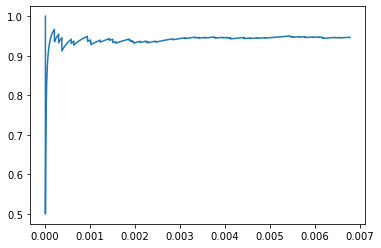

In [91]:
pyplot.plot(x_axis_recall, y_axis_precision)